# Visualize with seaborn

For intermediate Python module

# 1)- Importing key libraries

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [2]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# What's life without style :). So, let's add style to our dataframes
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
import pandas as pd
import numpy as np
import numpy as np
from scipy import stats, integrate
import seaborn as sns
sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# first install: pip install version_information
%reload_ext version_information
%version_information math, ,pandas, numpy, sys, platform,seaborn

Software versions
Python 3.6.3 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.4.0
OS Windows 10 10.0.16299 SP0
math The 'math' distribution was not found and is required by the application
pandas 0.23.4
numpy 1.16.2
sys The 'sys' distribution was not found and is required by the application
platform 1.0.8
seaborn 0.9.0
Mon Aug 19 21:15:35 2019 W. Europe Daylight Time

# 1)-Plotting with categorical data

In [6]:
np.random.seed(sum(map(ord, "categorical")))

### Categorical scatterplots

In [7]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


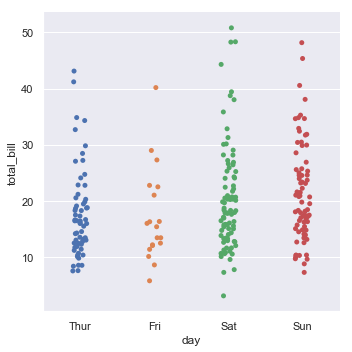

In [8]:
sns.catplot(x="day", y="total_bill", data=tips);

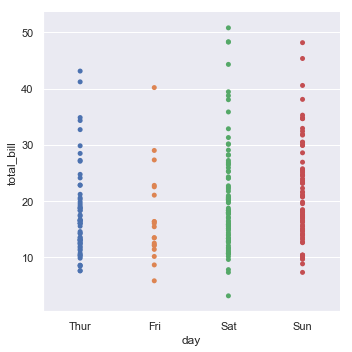

In [9]:
#The jitter parameter controls the magnitude of jitter or disables it altogether
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

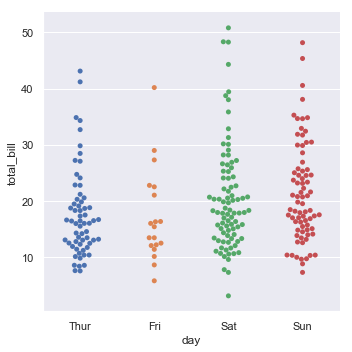

In [10]:
#“beeswarm
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

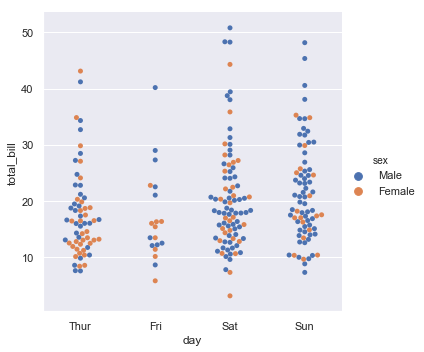

In [11]:
#The categorical plots do not currently support size or style semantics). Each different categorical plotting function handles the hue semantic differently. For the scatter plots, it is only necessary to change the color of the points:

sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

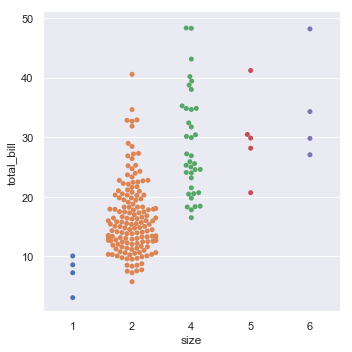

In [12]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

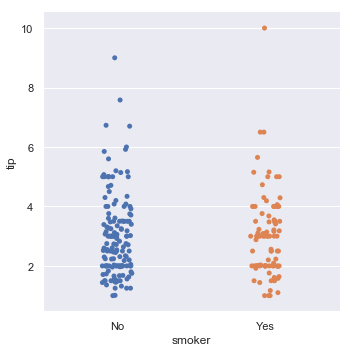

In [13]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

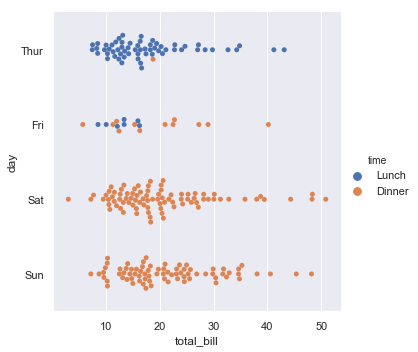

In [14]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

# 2)-Distributions of observations within categories

### Boxplots

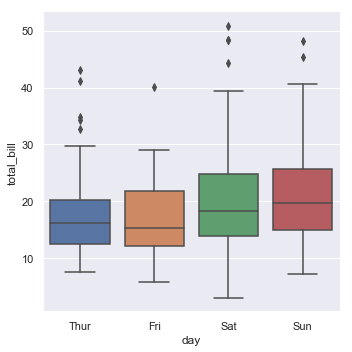

In [15]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

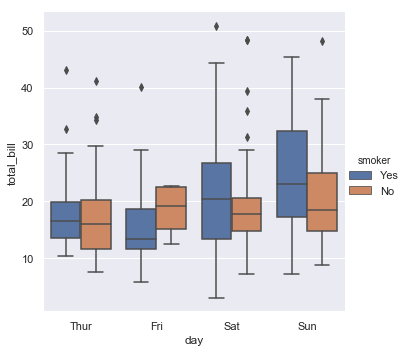

In [16]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

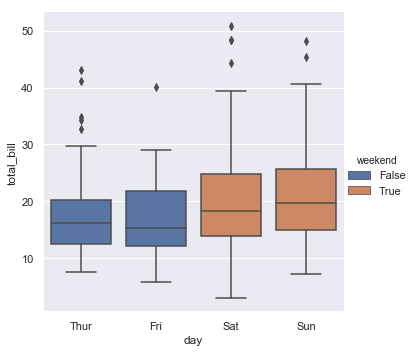

In [17]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

In [18]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


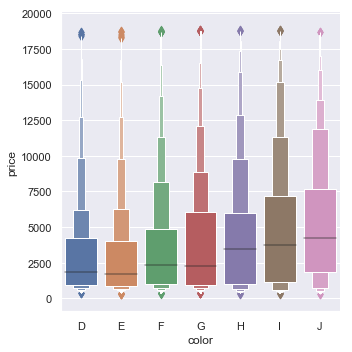

In [19]:
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

### Violinplots

A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure 


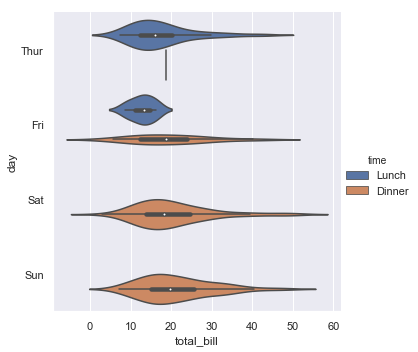

In [20]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

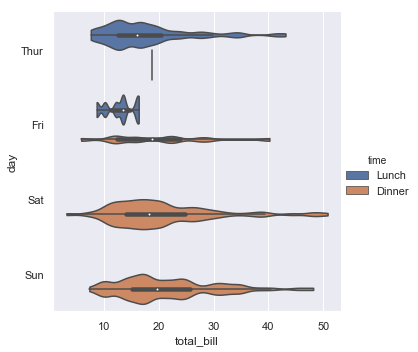

In [21]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", bw=.15, cut=0,
            data=tips);

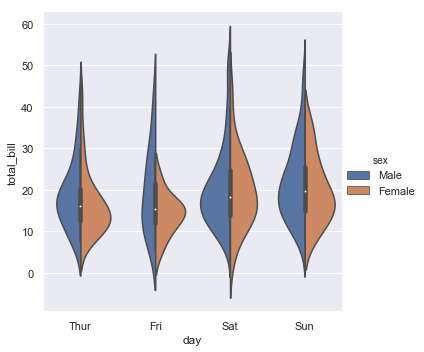

In [22]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

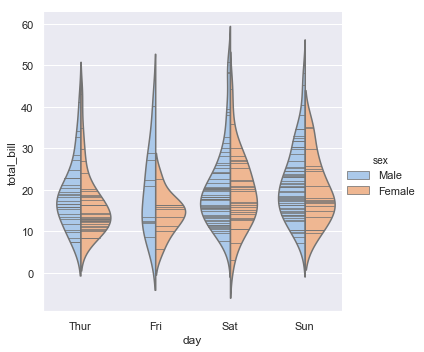

In [23]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

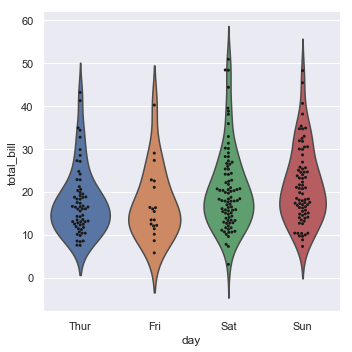

In [24]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

# 3)-Statistical estimation within categories

### Bar plots

In [25]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


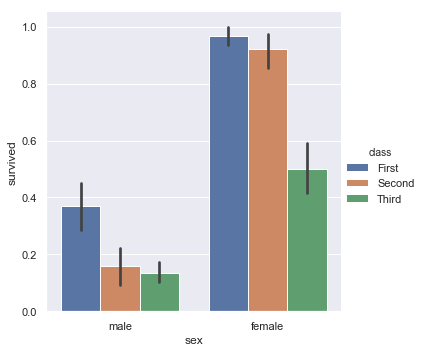

In [26]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

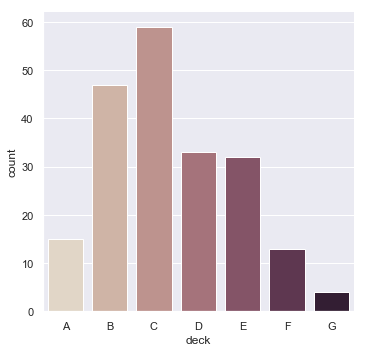

In [27]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

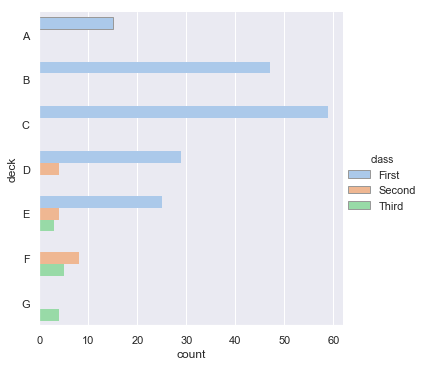

In [28]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

### Point plots

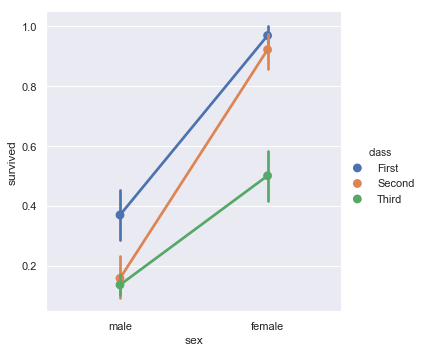

In [29]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

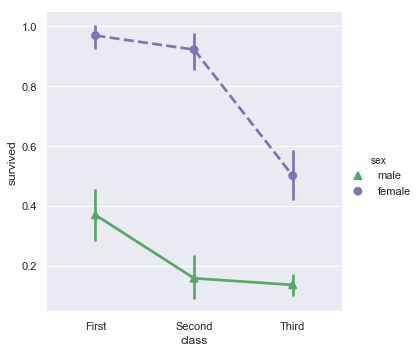

In [30]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

### Plotting “wide-form” data

In [31]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


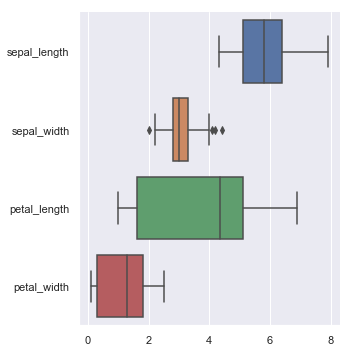

In [32]:
sns.catplot(data=iris, orient="h", kind="box");

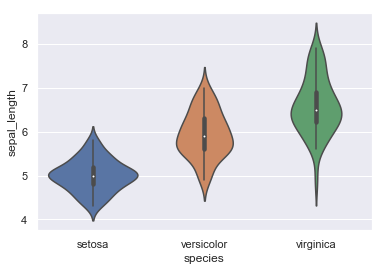

In [33]:
sns.violinplot(x=iris.species, y=iris.sepal_length);

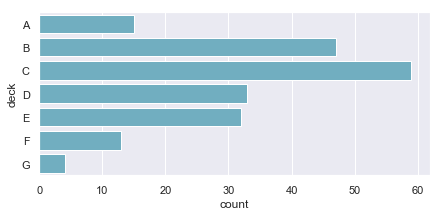

In [34]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

### Showing multiple relationships with facets

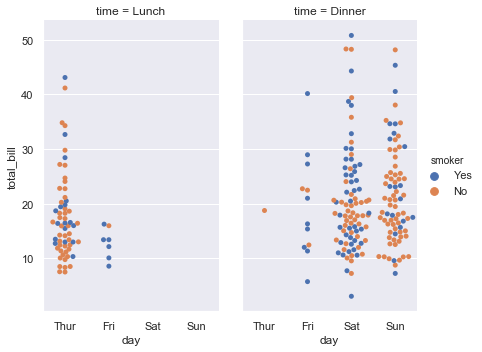

In [35]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

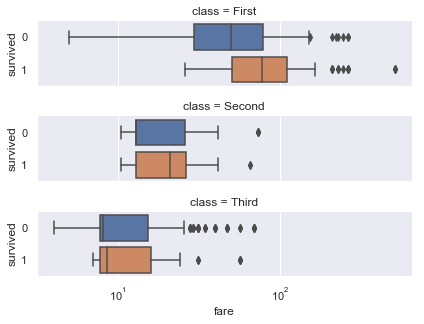

In [36]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");

# 4)-Visualizing the distribution of a dataset

In [37]:
np.random.seed(sum(map(ord, "distributions")))

## 4a)- Plotting univariate distributions

In [38]:
x = np.random.normal(size=100)
x[:5]

array([ 0.42852369,  1.19133255, -0.45820746, -1.85860798,  1.02445299])

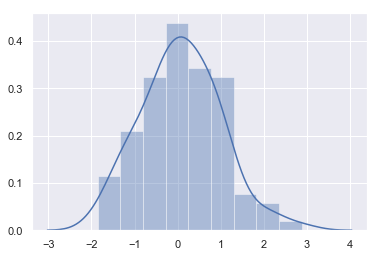

In [39]:
sns.distplot(x)

### Histograms

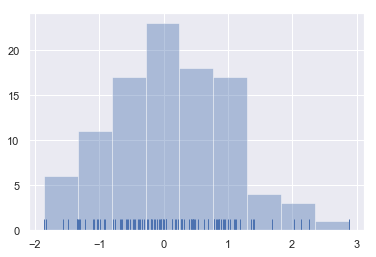

In [40]:
sns.distplot(x, kde=False, rug=True)

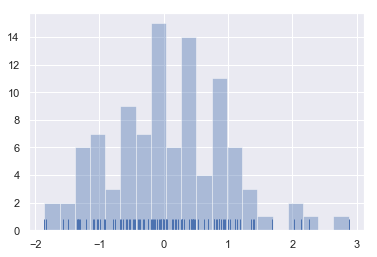

In [41]:
sns.distplot(x, bins=20, kde=False, rug=True)

### Kernel density estimaton

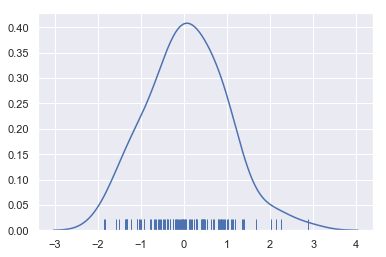

In [42]:
sns.distplot(x, hist=False, rug=True)

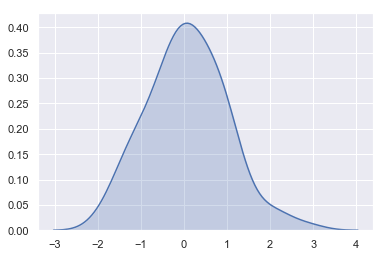

In [43]:
sns.kdeplot(x, shade=True)

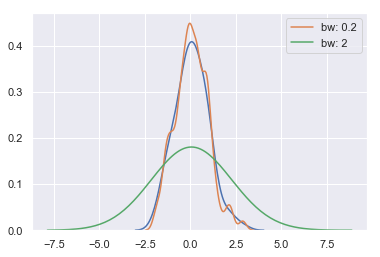

In [44]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

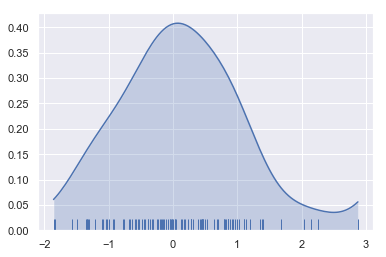

In [45]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x)

### Fitting parametric distributions

In [46]:
x = np.random.gamma(6, size=200)
x[:5]

array([ 7.6033878 ,  7.55088281,  5.47982722, 13.32978446,  9.65640097])

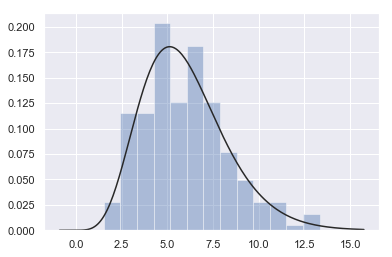

In [47]:
sns.distplot(x, kde=False, fit=stats.gamma)

## 4b)-Plotting bivariate distributions

In [48]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

In [49]:
df.head()

,x,y
0,2.190873,2.902961
1,0.387901,3.441322
2,-1.304909,0.586173
3,-0.016867,0.907323
4,0.284953,1.189304


### Scatterplots

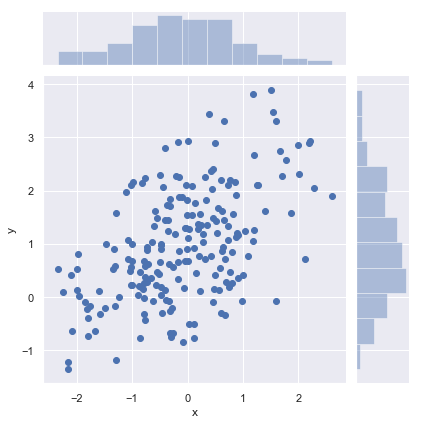

In [50]:
sns.jointplot(x="x", y="y", data=df)

### Hexbin plots

In [51]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
x[:5], y[:5]

(array([ 1.99235596, -0.61418642, -2.14398466,  0.48387848,  0.92942069]),
 array([2.57459216, 1.04544643, 1.23221587, 0.74845389, 1.56673578]))

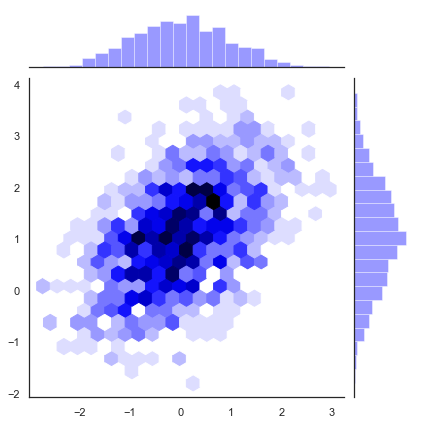

In [52]:
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="blue")

### Kernel density estimation

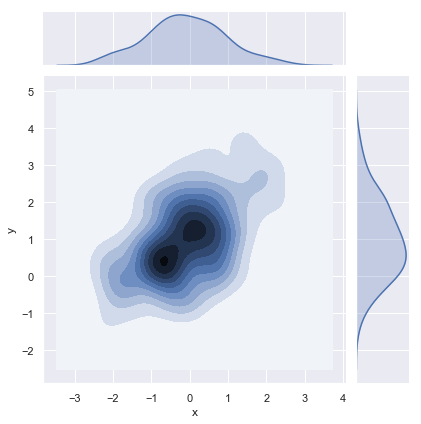

In [53]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

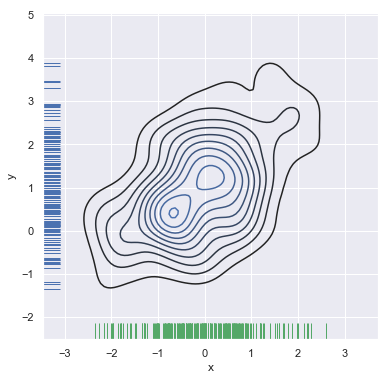

In [54]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

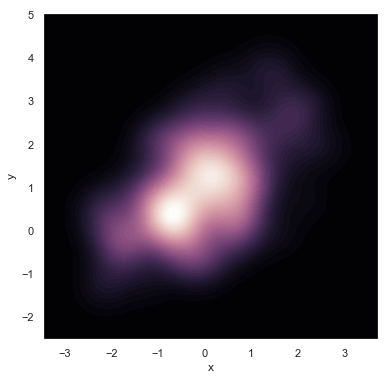

In [55]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)

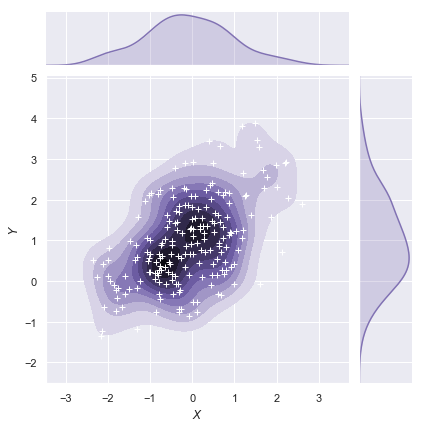

In [56]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

## 4c)-Visualizing pairwise relationships in a dataset

In [57]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


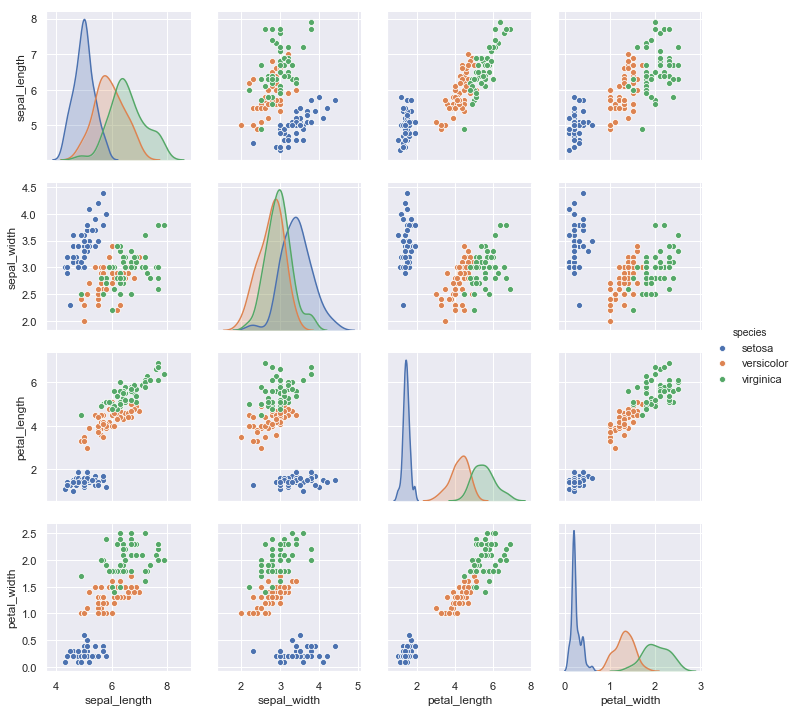

In [58]:
sns.pairplot(iris, hue='species')

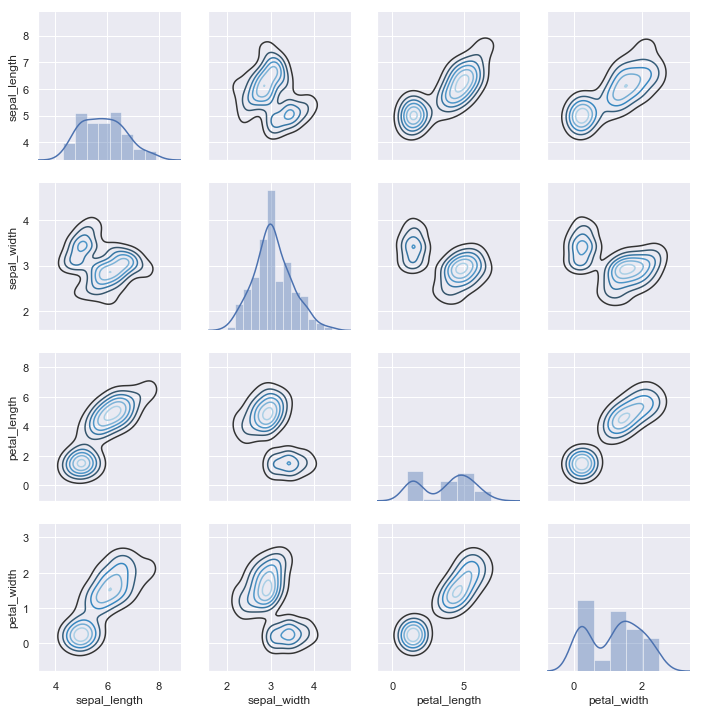

In [59]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

# 5)-Visualizing linear relationships

In [60]:
np.random.seed(sum(map(ord, "regression")))

In [61]:
tips = sns.load_dataset("tips")

In [62]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [63]:
tips.shape

(244, 7)

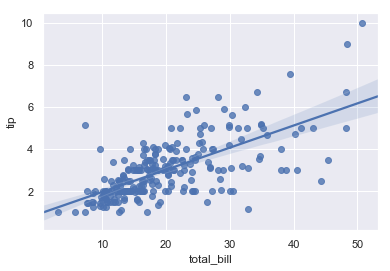

In [64]:
sns.regplot(x="total_bill", y="tip", data=tips)

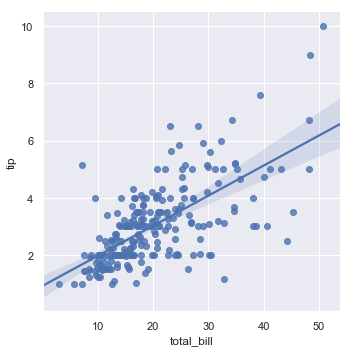

In [65]:
sns.lmplot(x="total_bill", y="tip", data=tips)

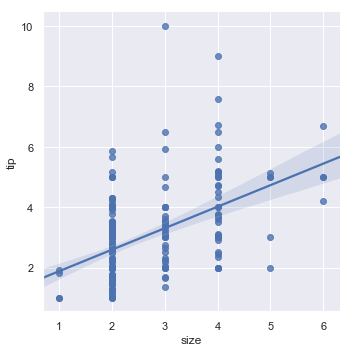

In [66]:
sns.lmplot(x="size", y="tip", data=tips)

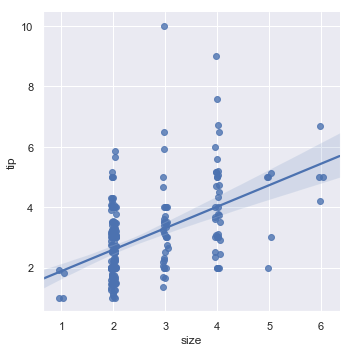

In [67]:
#One option is to add some random noise ("jitter") to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05)

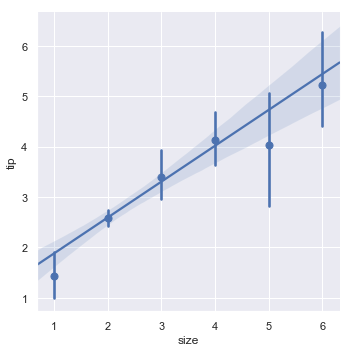

In [68]:
# second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

### Fitting different kinds of models

In [69]:
anscombe = sns.load_dataset("anscombe")

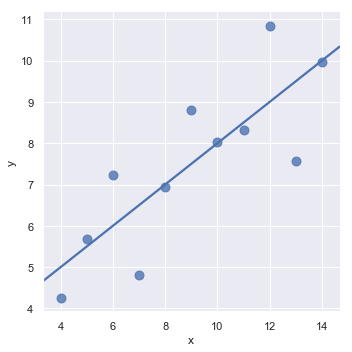

In [70]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80})

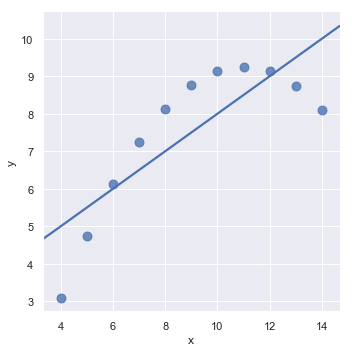

In [71]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80})

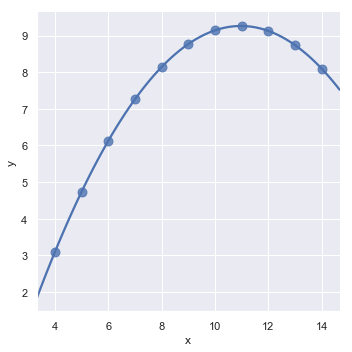

In [72]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80})

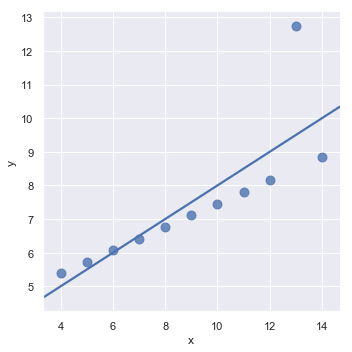

In [73]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80})

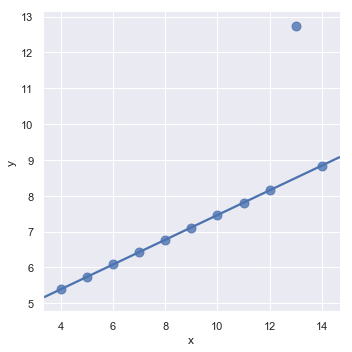

In [74]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80})

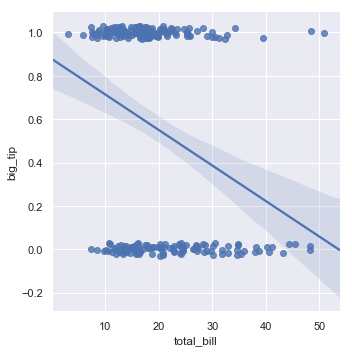

In [75]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03)

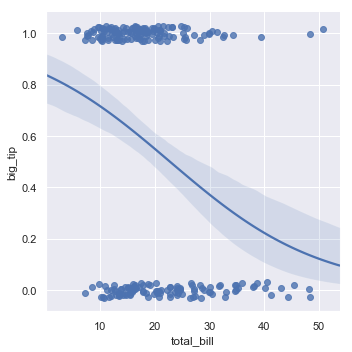

In [76]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03)

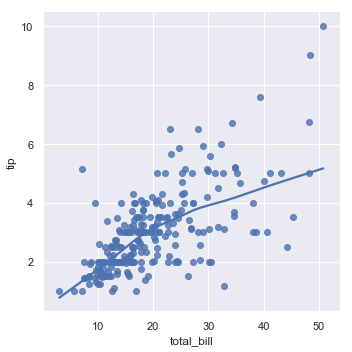

In [77]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True)

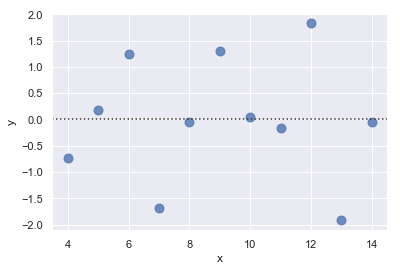

In [78]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80})

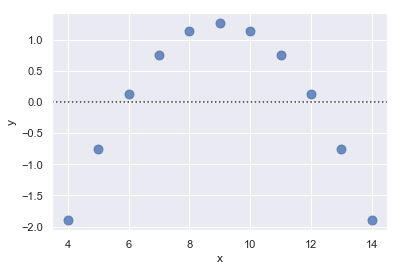

In [79]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80})

### Conditioning on other variables

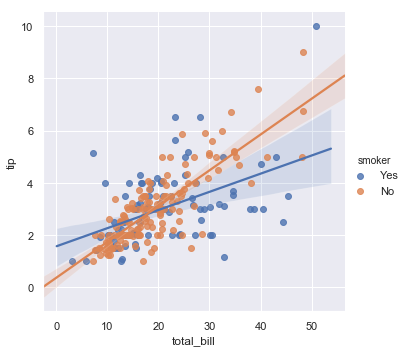

In [80]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

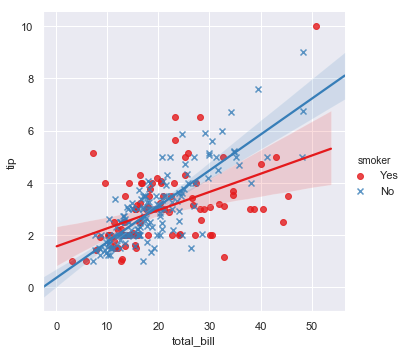

In [81]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1")

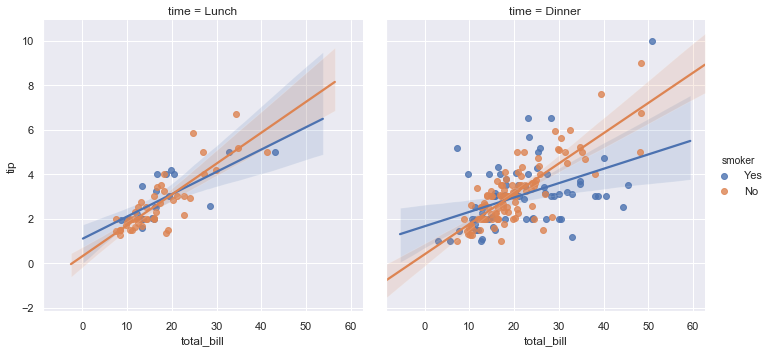

In [82]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue="smoker", col="time")

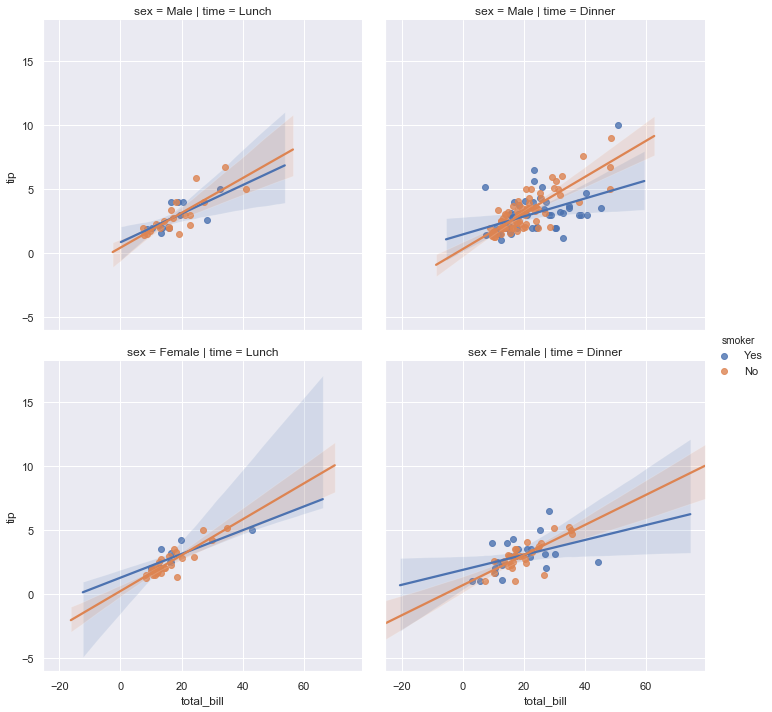

In [83]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips)

### Controlling the size and shape of the plot

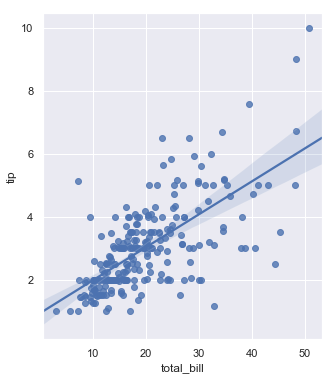

In [84]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax)

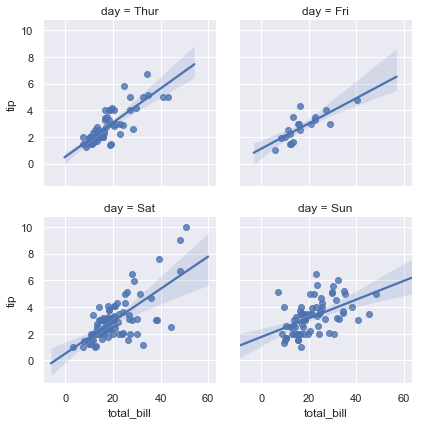

In [85]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3)

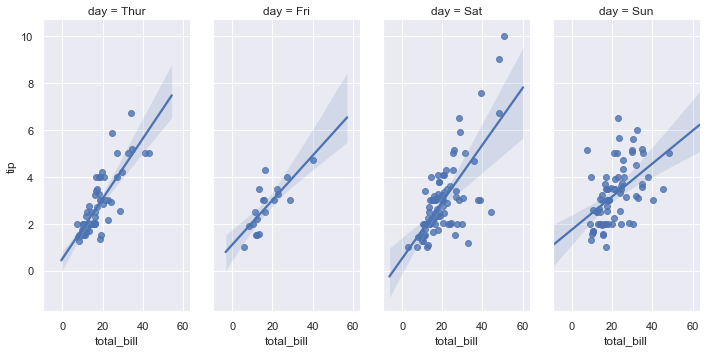

In [86]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5)

### Plotting a regression in other contexts

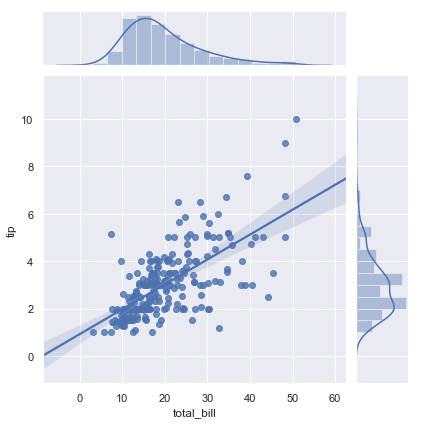

In [87]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

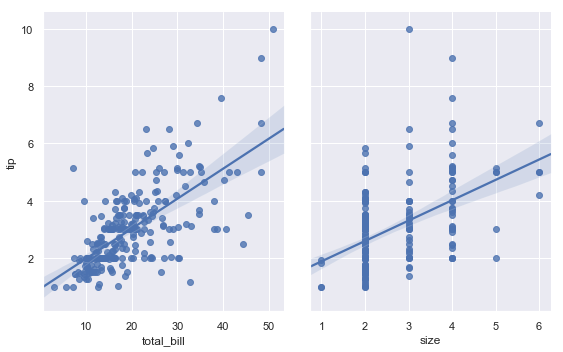

In [88]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg")

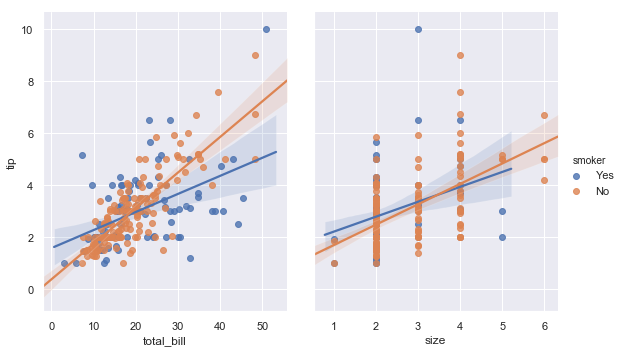

In [89]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg")

# 6)-Building structured multi-plot grids

In [90]:
np.random.seed(sum(map(ord, "axis_grids")))

### Subsetting data with FacetGrid

In [91]:
tips = sns.load_dataset("tips")

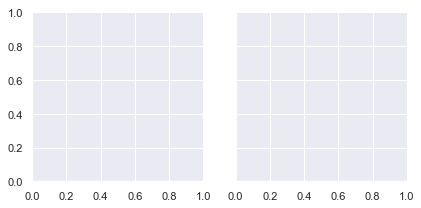

In [92]:
g = sns.FacetGrid(tips, col="time")

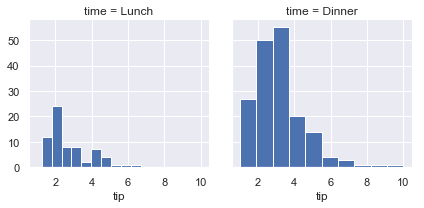

In [93]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip")

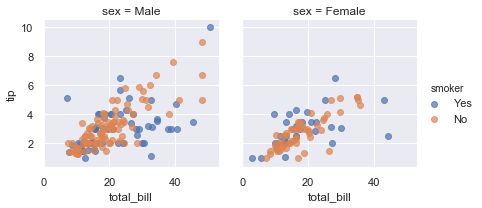

In [94]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()

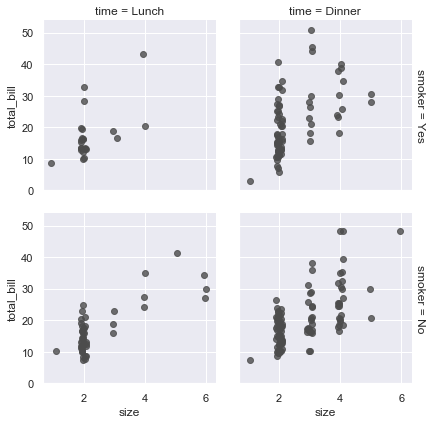

In [95]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1)

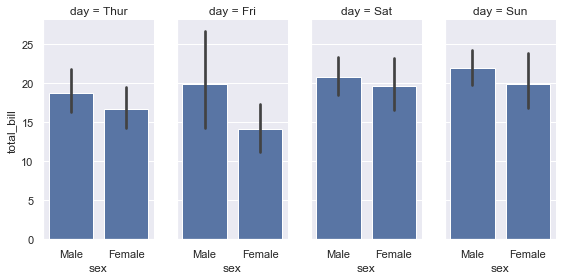

In [96]:
g = sns.FacetGrid(tips, col="day", size=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill")

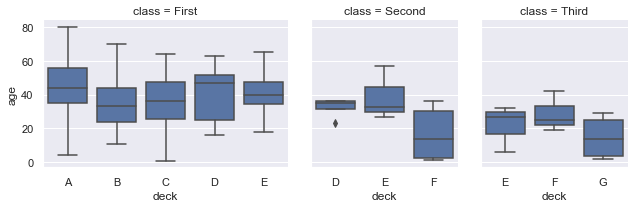

In [97]:
titanic = sns.load_dataset("titanic")
titanic = titanic.assign(deck=titanic.deck.astype(object)).sort_values("deck")
g = sns.FacetGrid(titanic, col="class", sharex=False,
                  gridspec_kws={"width_ratios": [5, 3, 3]})
g.map(sns.boxplot, "deck", "age")

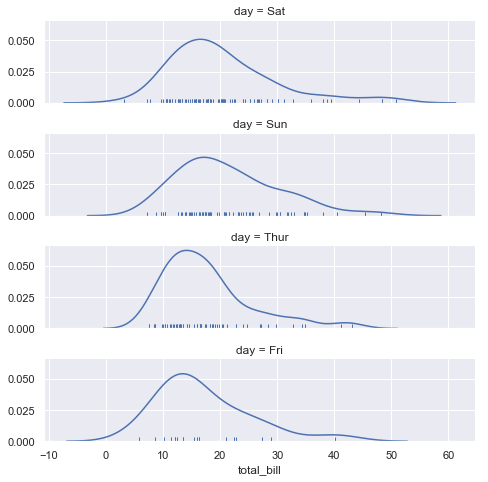

In [98]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  size=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True)

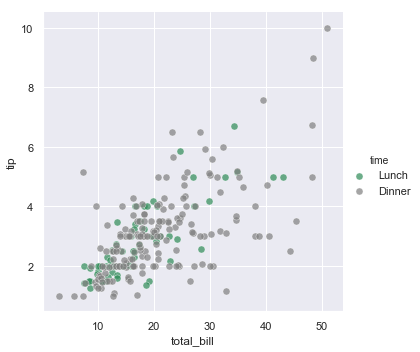

In [99]:
pal = dict(Lunch="seagreen", Dinner="gray")
g = sns.FacetGrid(tips, hue="time", palette=pal, size=5)
g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend()

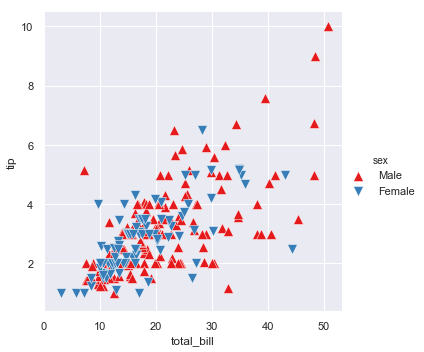

In [100]:
g = sns.FacetGrid(tips, hue="sex", palette="Set1", size=5, hue_kws={"marker": ["^", "v"]})
g.map(plt.scatter, "total_bill", "tip", s=100, linewidth=.5, edgecolor="white")
g.add_legend()

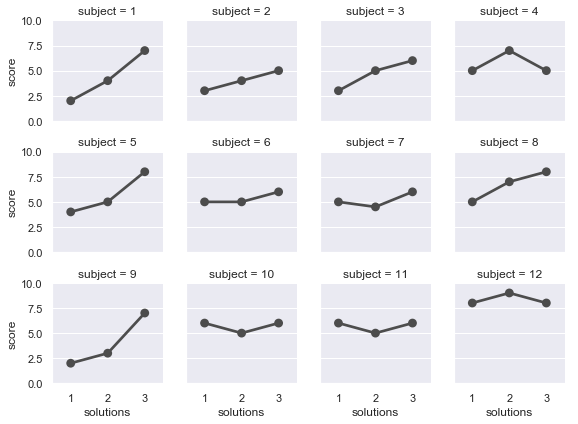

In [101]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, size=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None)

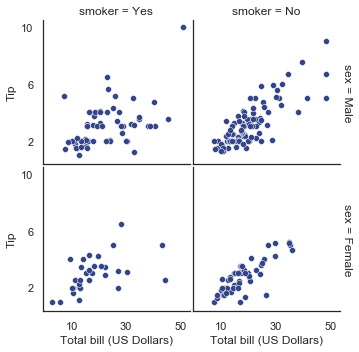

In [102]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, size=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.fig.subplots_adjust(wspace=.02, hspace=.02)

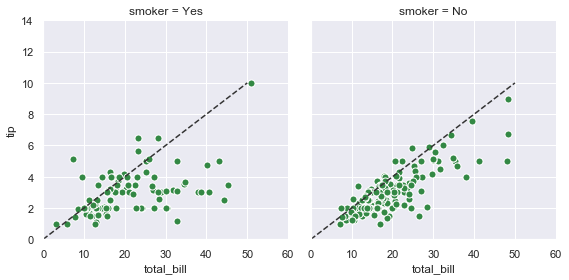

In [103]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, size=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14))

### Mapping custom functions onto the grid

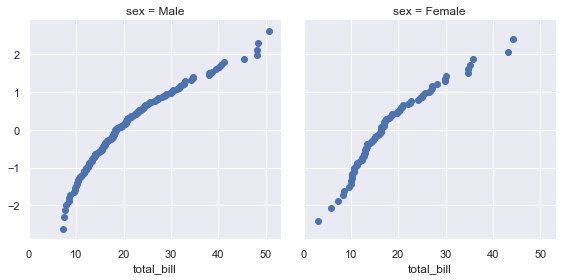

In [104]:
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)
    
g = sns.FacetGrid(tips, col="sex", size=4)
g.map(quantile_plot, "total_bill")

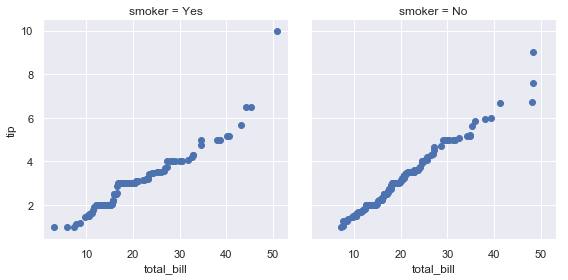

In [105]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)
    
g = sns.FacetGrid(tips, col="smoker", size=4)
g.map(qqplot, "total_bill", "tip")

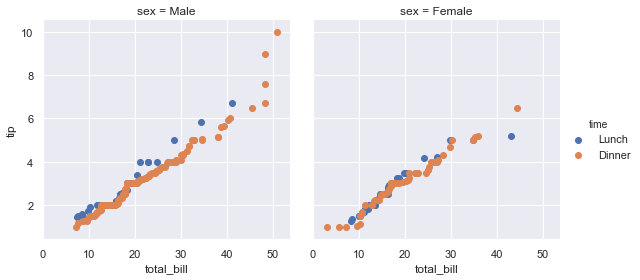

In [106]:
g = sns.FacetGrid(tips, hue="time", col="sex", size=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend()

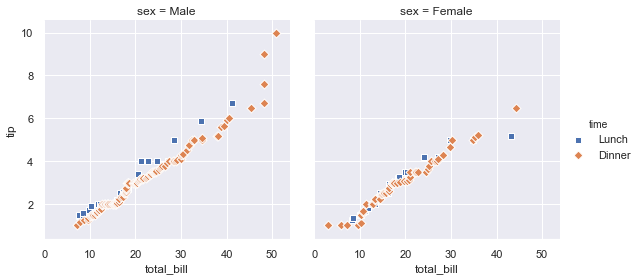

In [107]:
g = sns.FacetGrid(tips, hue="time", col="sex", size=4,
                  hue_kws={"marker": ["s", "D"]})
g.map(qqplot, "total_bill", "tip", s=40, edgecolor="w")
g.add_legend()

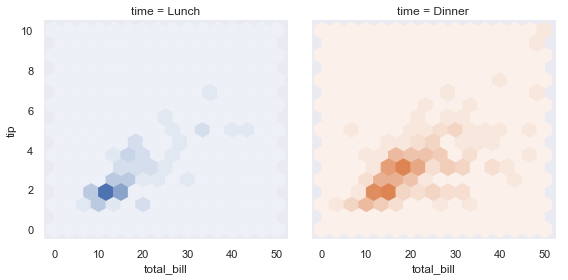

In [108]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", size=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10])

### Plotting pairwise relationships with PairGrid and pairplot

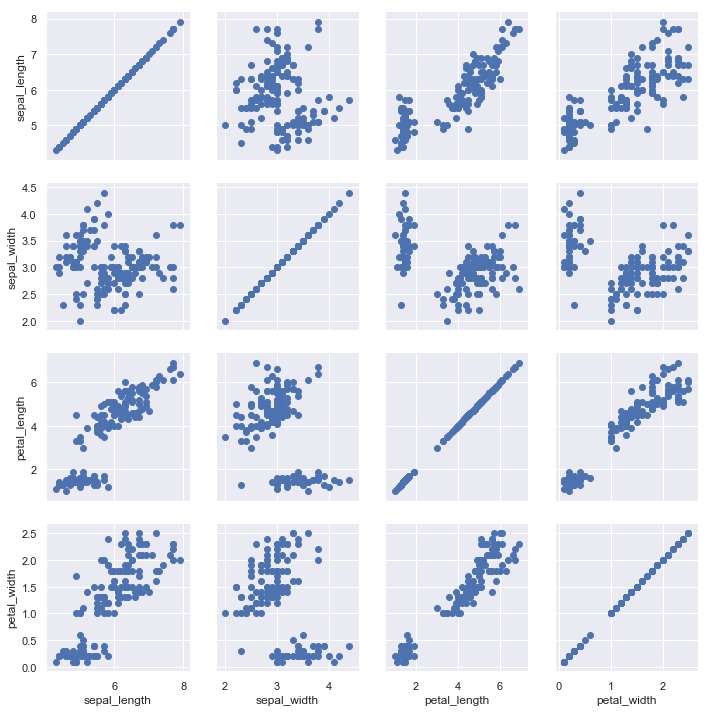

In [109]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter)

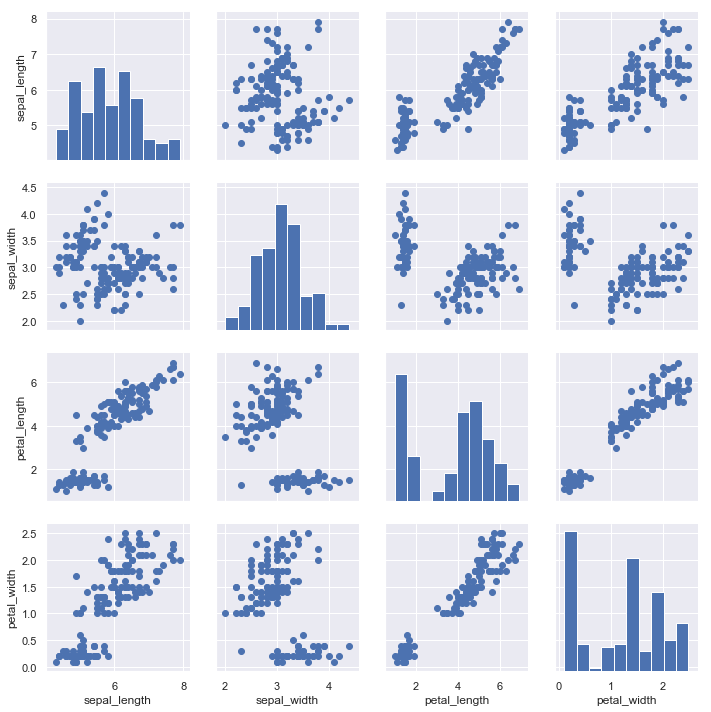

In [110]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

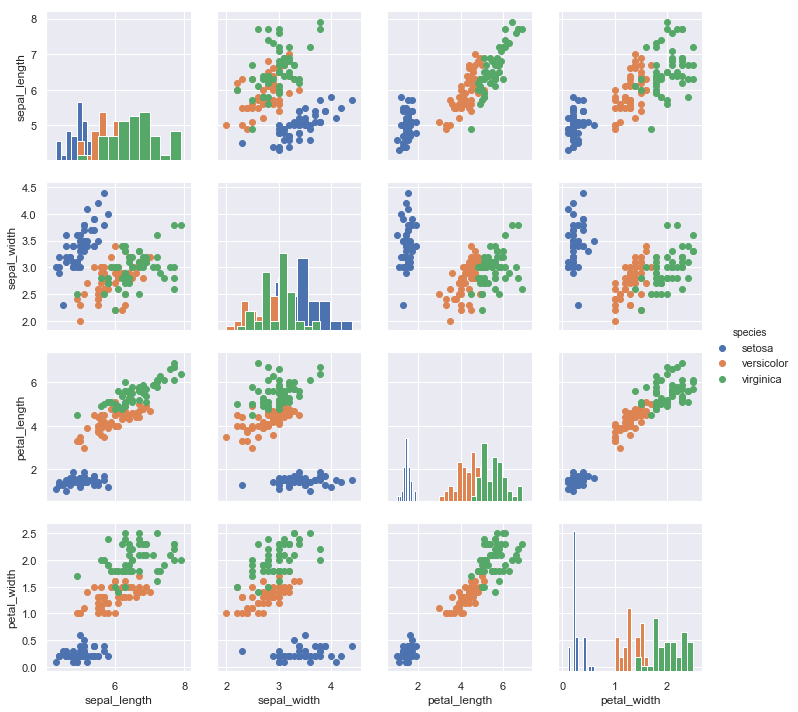

In [111]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

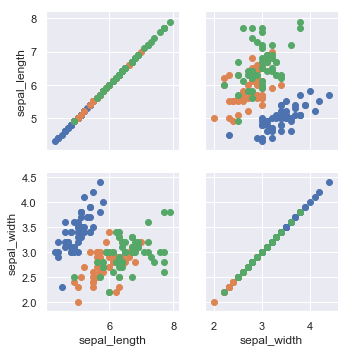

In [112]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g.map(plt.scatter)

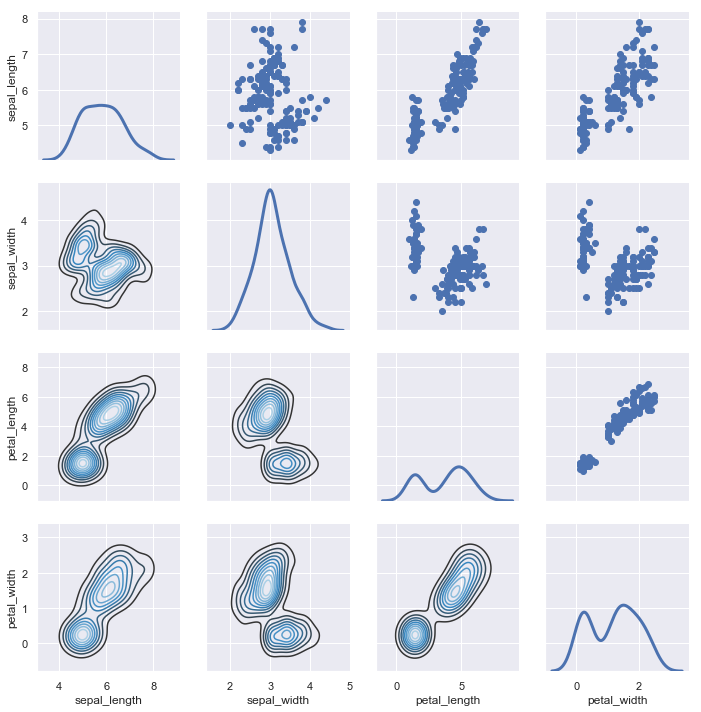

In [113]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False)

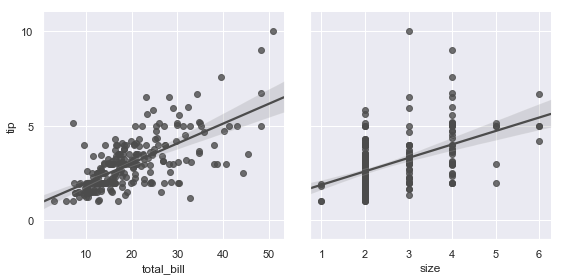

In [114]:
g = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], size=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10])

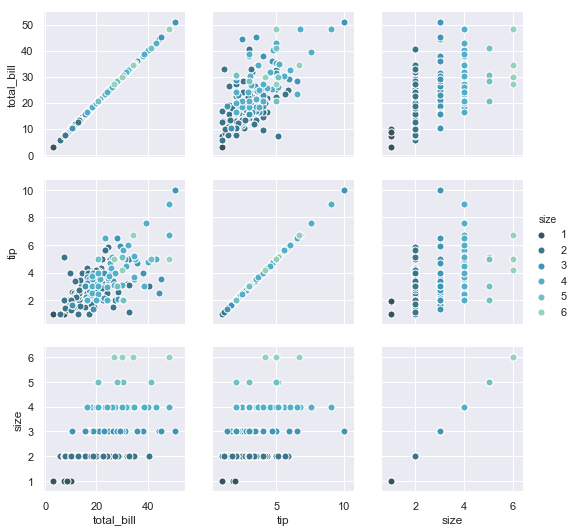

In [115]:
g = sns.PairGrid(tips, hue="size", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend()

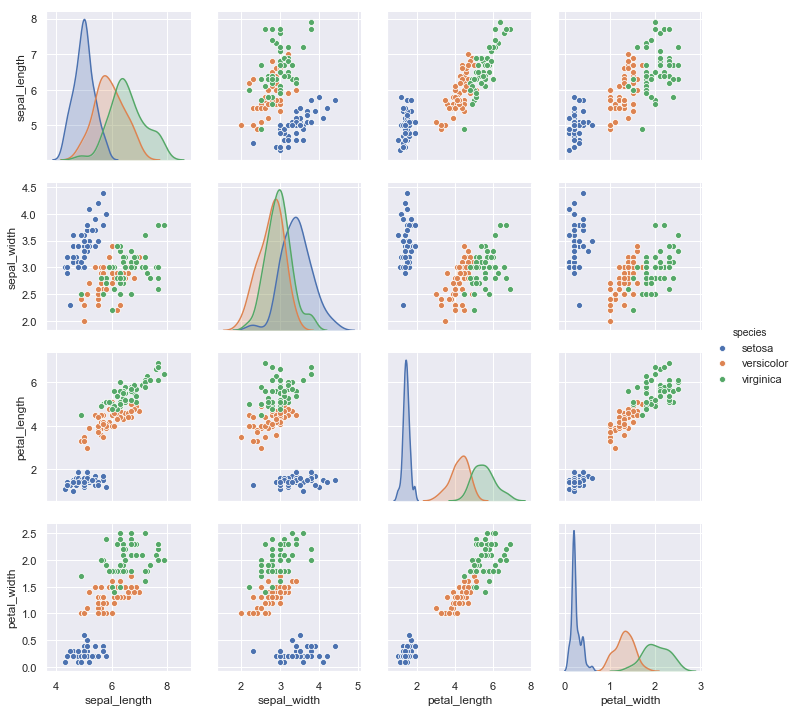

In [116]:
sns.pairplot(iris, hue="species", size=2.5)

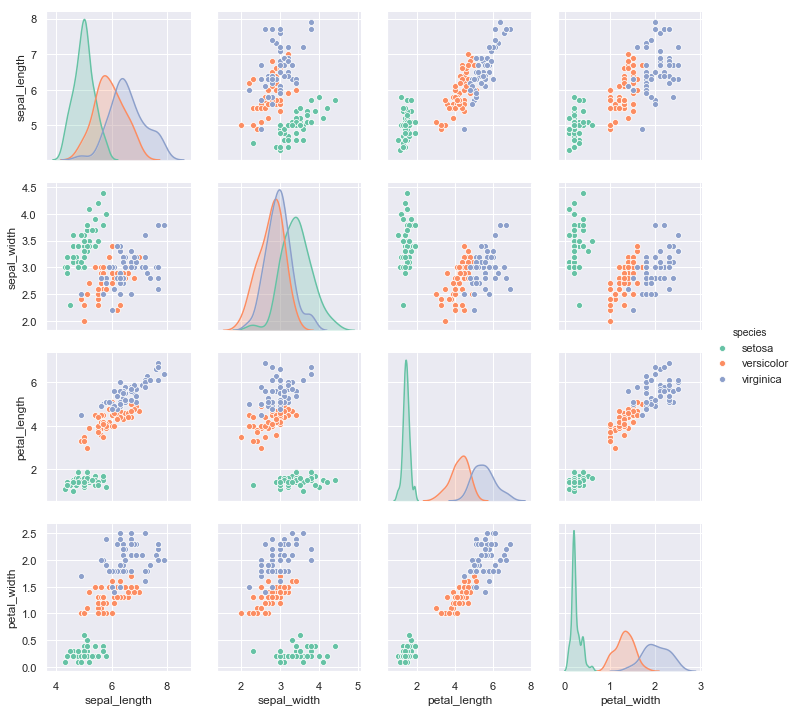

In [117]:
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", size=2.5)